# Escolha de DJ

### Elisa Malzoni e Bruna Kimura
---------------------------------------

In [1]:
%matplotlib inline
import sys
sys.path.append('..')

from random import choice
from itertools import permutations

import pandas as pd
import networkx as nx

import socnet as sn
import numpy as np
from scipy.stats import norm, linregress

import matplotlib.pyplot as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
sn.node_size = 10
sn.node_color = (255, 255, 255)

sn.edge_width = 1
sn.edge_color = (192, 192, 192)

sn.node_label_position = 'top center'

## One-mode

In [3]:
om = sn.load_graph('one-mode.gml')

sn.show_graph(om, nlab=True)

../socnet.py:59: RuntimeWarning:

divide by zero encountered in double_scalars

../socnet.py:187: RuntimeWarning:

invalid value encountered in double_scalars

../socnet.py:188: RuntimeWarning:

invalid value encountered in double_scalars

../socnet.py:189: RuntimeWarning:

invalid value encountered in double_scalars

../socnet.py:190: RuntimeWarning:

invalid value encountered in double_scalars



## Two-mode

In [4]:
tm = sn.load_graph('two-mode.gml')

sn.show_graph(tm, nlab=True)

## Indegree do one-mode

In [5]:
sorted([[om.in_degree(n), om.nodes[n]["label"]] for n in om.nodes])

[[0, 'Ale'],
 [0, 'Joao'],
 [0, 'Paulo'],
 [0, 'Pedro'],
 [0, 'Tirta'],
 [1, 'Bruna'],
 [1, 'Carlos'],
 [1, 'Jean'],
 [2, 'Elisa'],
 [2, 'Gabs'],
 [2, 'Leo'],
 [2, 'Martim'],
 [2, 'Rios'],
 [2, 'Sabrina'],
 [3, 'Antonio'],
 [3, 'Isa'],
 [3, 'Rapha'],
 [5, 'Rachel'],
 [5, 'Vitoria'],
 [6, 'Chen'],
 [7, 'Forba'],
 [7, 'Fred'],
 [7, 'Toyama'],
 [10, 'Graicer'],
 [12, 'Hugo']]

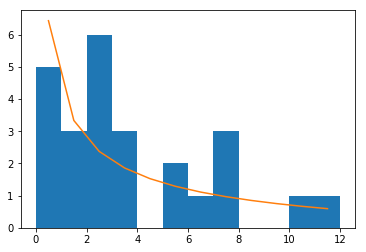

In [6]:
hist = plt.hist([om.in_degree(n) for n in om.nodes],bins=[i for i in range(13)])
xdata = [(l + r)/2 for l, r in zip(hist[1][:-1], hist[1][1:])]
ydata = [h + 1 for h in hist[0]]

reg = linregress(np.log(xdata), np.log(ydata))

plt.plot(xdata, [x ** reg[0] * np.exp(reg[1]) - 1 for x in xdata])

plt.show()

## hub e Authority do two-mode

In [79]:
estilos = ['Samba', 'MPB', 'Rap Nacional', 'Pop', 'K-Pop', 'Metal', 'Indie Rock', 'Funk', 'Sertanejo', 
           'Eletronica', 'Pop Rock', 'Disco', 'Opera', 'Pagode', 'Rock classico', 'Jazz', 'J-Pop']

pessoas = ['Isa', 'Chen', 'Ale', 'Rapha', 'Paulo', "Elisa", 'Pedro', "Antonio", 'Forba', 'Hugo', 'Vitoria',
          'Fred', 'Rachel', 'Toyama', 'Sabrina', 'Gabs', 'Bruna', 'Martim', 'Joao', 'Jean', 'Carlos', 'Leo',
          'Graicer']

nodes_estilo = []
nodes_pessoas = []

#acha os nós com estilo
for n in tm.nodes:
    if tm.nodes[n]["label"] in estilos:
        nodes_estilo.append(n)

#acha os nós com pessoas
for n in tm.nodes:
    if tm.nodes[n]["label"] in pessoas:
        nodes_pessoas.append(n)
        
#faz tabela com o in degree dos estilos
indegree_tm =[]
for n in tm.nodes:
    if n in nodes_estilo:
        indegree_tm.append(tm.in_degree(n))

In [89]:
def outdegree_p(list_nodes):
    outdegree_pond =[]
    for n in list_nodes:
        if n in nodes_pessoas:
            a =[s for s in tm.successors(n)]
            outdegree_pond.append([list_nodes[n]["label"], tm.out_degree(n), a])
    return outdegree_pond

In [90]:
#calculo do out degree ponderado
outdegree_pond = outdegree_p(tm.nodes)
outdegree_pond

[['Isa', 7, [0, 31, 25, 5, 26, 24, 19]],
 ['Chen', 6, [15, 36, 17, 32, 24, 4]],
 ['Ale', 6, [17, 28, 24, 32, 36, 3]],
 ['Rapha', 5, [19, 4, 22, 31, 24]],
 ['Paulo', 3, [15, 32, 25]],
 ['Elisa', 2, [25, 5]],
 ['Pedro', 5, [17, 26, 25, 32, 24]],
 ['Antonio', 5, [22, 5, 19, 28, 36]],
 ['Forba', 15, [37, 36, 14, 22, 4, 25, 26, 5, 3, 15, 0, 24, 31, 17, 32]],
 ['Hugo', 7, [3, 5, 19, 24, 31, 22, 26]],
 ['Vitoria', 7, [24, 32, 17, 15, 5, 3, 25]],
 ['Fred', 7, [3, 26, 24, 36, 37, 0, 31]],
 ['Rachel', 7, [31, 25, 24, 5, 22, 19, 4]],
 ['Toyama', 8, [25, 24, 17, 4, 15, 31, 32, 37]],
 ['Sabrina', 10, [26, 5, 14, 25, 37, 32, 22, 19, 17, 24]],
 ['Gabs', 5, [19, 24, 4, 31, 22]],
 ['Bruna', 4, [4, 37, 15, 24]],
 ['Martim', 5, [24, 19, 25, 4, 5]],
 ['Joao', 6, [22, 31, 32, 4, 19, 24]],
 ['Jean', 10, [32, 15, 25, 5, 37, 24, 26, 3, 36, 17]],
 ['Carlos', 2, [24, 5]],
 ['Leo', 1, [37]],
 ['Graicer', 6, [4, 3, 26, 32, 24, 31]]]

In [92]:
def indegree_p(list_nodes):
    indegree_pond_fake = [[i, 0] for i in range(len(tm.nodes))]
    indegree_pond = []
    
    for n in list_nodes:
        for estilo in n[2]:
            indegree_pond_fake[estilo][1]+=1

    for e in indegree_pond_fake:
        if tm.nodes[e[0]]["label"] in estilos:
            indegree_pond.append([e[0], e[1]])   

    soma = 0

    for e in indegree_pond:
        soma+=e[1]

    print("soma: ",soma) 

    for e in indegree_pond:
        e[1] /= soma

    print(indegree_pond)
    
    return indegree_pond

In [98]:
est_ind_pond = indegree_p(outdegree_pond)

soma:  139
[[0, 0.02158273381294964], [3, 0.050359712230215826], [4, 0.07194244604316546], [5, 0.07913669064748201], [14, 0.014388489208633094], [15, 0.050359712230215826], [17, 0.05755395683453238], [19, 0.06474820143884892], [22, 0.05755395683453238], [24, 0.1366906474820144], [25, 0.07913669064748201], [26, 0.05755395683453238], [28, 0.014388489208633094], [31, 0.07194244604316546], [32, 0.07913669064748201], [36, 0.04316546762589928], [37, 0.050359712230215826]]


In [105]:
def norm_outdegree(est_ind_pond_f):
    list_norm_outpond = []
    for n in outdegree_pond:
        soma = 0
        for estilo in n[2]:
            for i in est_ind_pond_f:
                if estilo == i[0]:
                    soma+=i[1]
        list_norm_outpond.append([n[0], soma, n[2]])
    return list_norm_outpond

In [106]:
norm_outdegree(est_ind_pond)

[['Isa', 0.5107913669064749, [0, 31, 25, 5, 26, 24, 19]],
 ['Chen', 0.4388489208633094, [15, 36, 17, 32, 24, 4]],
 ['Ale', 0.381294964028777, [17, 28, 24, 32, 36, 3]],
 ['Rapha', 0.40287769784172667, [19, 4, 22, 31, 24]],
 ['Paulo', 0.20863309352517984, [15, 32, 25]],
 ['Elisa', 0.15827338129496402, [25, 5]],
 ['Pedro', 0.41007194244604317, [17, 26, 25, 32, 24]],
 ['Antonio', 0.2589928057553956, [22, 5, 19, 28, 36]],
 ['Forba',
  0.9208633093525179,
  [37, 36, 14, 22, 4, 25, 26, 5, 3, 15, 0, 24, 31, 17, 32]],
 ['Hugo', 0.5179856115107914, [3, 5, 19, 24, 31, 22, 26]],
 ['Vitoria', 0.5323741007194245, [24, 32, 17, 15, 5, 3, 25]],
 ['Fred', 0.4316546762589928, [3, 26, 24, 36, 37, 0, 31]],
 ['Rachel', 0.5611510791366907, [31, 25, 24, 5, 22, 19, 4]],
 ['Toyama', 0.5971223021582733, [25, 24, 17, 4, 15, 31, 32, 37]],
 ['Sabrina', 0.6762589928057554, [26, 5, 14, 25, 37, 32, 22, 19, 17, 24]],
 ['Gabs', 0.40287769784172667, [19, 24, 4, 31, 22]],
 ['Bruna', 0.3093525179856115, [4, 37, 15, 24]],
 